## <a>1. Importing the Libraries and Datasets </a>

In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('white')

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix , accuracy_score 
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Importing the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

## <a>2. Exploring the dataset</a>

**Heart failure is a common event caused by Cardio Vascular Diseases(CVDs) and this dataset contains 12 features that can be used to predict mortality by heart failure.**

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### <a>All the columns are explained below with their normal ranges</a>

**Creatinine phosphokinase** (CPK) states the level of the CPK enzyme in blood. When a muscle tissue gets damaged, CPK flows into the blood. Therefore, high levels of CPK in the blood of a patient might indicate a heart failure or injury.The CPK normal range is **10-120 micrograms per liter (mcg/L)**.

**Diabetes** is a matabolic disease that cause high blood sugar.

**Anaemia** is a condition that develops when your blood lacks enough healthy red blood cells(RBCs) or hemoglobin.

**Ejection Fraction** (Pumping ability of heart) The ejection fraction states the percentage of how much blood the left ventricle pumps out with each contraction.A normal heart's ejection fraction may be **between 50 and 70 percent**.

**Platelets** in the blood (kiloplatelets/mL). Normal range is **between 150000 to 400000 (kiloplatelets/mL)**.

**Serum creatinine** is a waste product generated by creatine, when a muscle breaks down. Especially, doctors focus on serum creatinine in blood to check kidney function. If a patient has high levels of serum creatinine, it may indicate renal dysfunction. The normal range for creatinine in the blood may be **0.84 to 1.21 milligrams per deciliter(mg/dL)**.

**Serum sodium** test is a routine blood exam that indicates if a patient has normal levels of sodium in the blood. An abnormally low level of sodium in the blood might be caused by heart failure. The normal range for blood sodium levels is **135 to 145 milliequivalents per liter (mEq/L).**

**time** is Follow-up period (in days)

**DEATH_EVENT** - If the patient deceased during the follow-up period

* Sex - Gender of patient Male = 1, Female =0
* Age - Age of patient
* Diabetes - 0 = No, 1 = Yes
* Anaemia(Loss of RBCs in blood) - 0 = No, 1 = Yes
* High_blood_pressure - 0 = No, 1 = Yes
* Smoking - 0 = No, 1 = Yes
* DEATH_EVENT - 0 = No, 1 = Yes

In [4]:
# null values in Dataset
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

>**We can see that there is no null values in our dataset.**

## <a>3. Visualising the Data </a>

### <a>3.1 Distribution of Age </a>

Text(0.5, 1, 'Distribution of AGE Vs DEATH_EVENT (0=Survived, 1=Not Survived)')

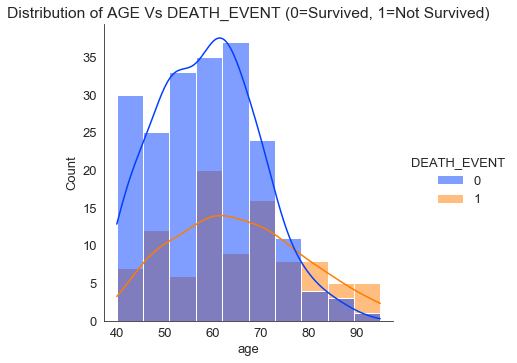

In [5]:
plt.rcParams.update({'font.size': 13})
sns.displot(df, x="age", hue="DEATH_EVENT", palette='bright', kde=True)
plt.title('Distribution of AGE Vs DEATH_EVENT (0=Survived, 1=Not Survived)')

> * Survival is high between ages 40 and 70
> * It is interseting to note that as people grew older there is less chance to survive.
> * The two curves overlaps at around 80, i.e, there are fewer people who survived above that age.

### <a>3.2 Distribution of Gender </a>

Text(0.5, 1.0, 'Distribution of GENDER Vs DEATH EVENT (0=Female, 1=Male)')

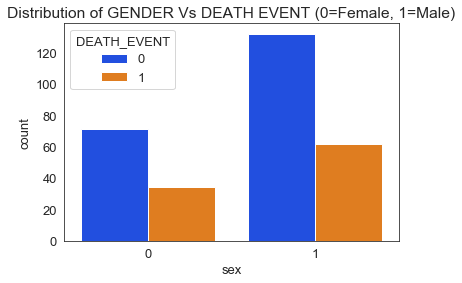

In [6]:

plt.rcParams.update({'font.size': 13})
sns.countplot(data=df, x='sex', hue='DEATH_EVENT',palette='bright',)
plt.title('Distribution of GENDER Vs DEATH EVENT (0=Female, 1=Male)')

> * There are more males in our data set than females
> * We can see that almost half of the males and females patients did not survive

###  <a>3.3 Correlation among features</a>

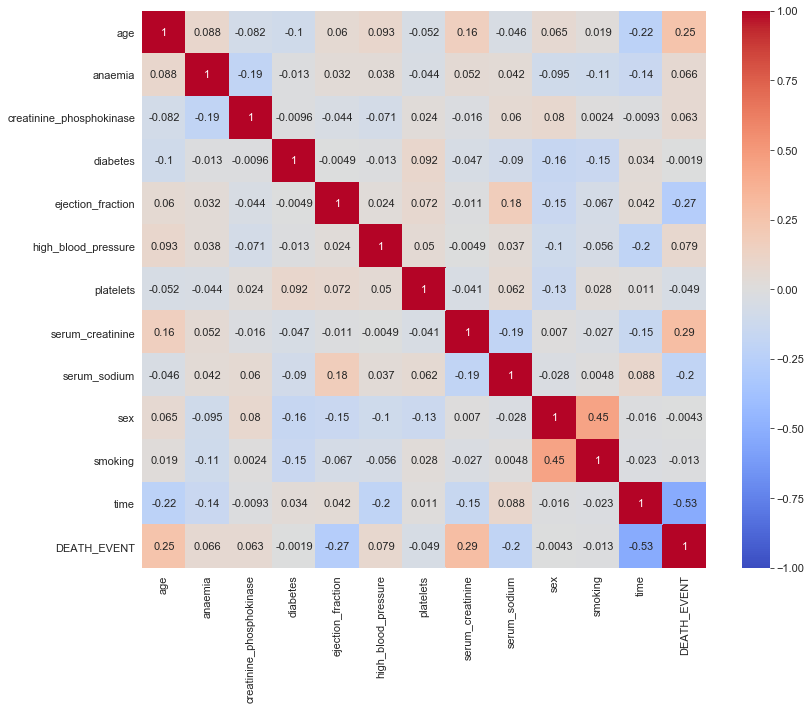

In [7]:
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True);
plt.tight_layout()

> It is clear from the above heatmap that:
> * Few columns have considerable correlation with DEATH_EVENT like 'age', 'serum_creatimine', 'time' etc.
> * While few have very less correlation with DEATH_EVENT like 'diabetes', 'sex' etc


## <a>4. Data Modeling and Prediction</a>

## <a>4.1 With all features</a>



In [8]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [9]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

accuracy_list = []

### KNN Classifier

In [10]:

knn = KNN(n_neighbors=10)
knn.fit(X_train, y_train)

# prediction
y_pred = knn.predict(X_test)

# evaluation
knn_accuracy = accuracy_score(y_test, y_pred)
knn_matrix = confusion_matrix(y_test, y_pred)
accuracy_list.append(knn_accuracy)
print("Accuracy is: ", knn_accuracy)

Accuracy is:  0.8


### Decision Tree Classifier

In [11]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=30, criterion='entropy')
dt_clf.fit(X_train, y_train)

# evaluation
dt_matrix = confusion_matrix(y_test, y_pred)
dt_accuracy = dt_clf.score(X_test,y_test)
accuracy_list.append(dt_accuracy)
print("Accuracy is: ", dt_accuracy)

Accuracy is:  0.85


### Random Forest Classifier

In [12]:
# Using Random Forest Classifier
rfc = RandomForestClassifier(random_state=1, n_estimators=100)
rfc.fit(X_train, y_train)

# Prediction
y_pred = rfc.predict(X_test)

# Evaluation
rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_matrix = confusion_matrix(y_test, y_pred)
accuracy_list.append(rfc_accuracy)
print("Accuracy is: ", rfc_accuracy)

Accuracy is:  0.95


## <a>4.2 Selecting features with considerable correlation only</a>

In [13]:
corr = df.corr()
corr[abs(corr['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

**Selecting only age, ejection_fraction, serum_creatinine, sodium_creatinine and time**

In [14]:
features = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']
X = df.loc[:, features]
y = df.loc[:, 'DEATH_EVENT']

In [15]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### KNN Classifier

In [16]:
knn = KNN(n_neighbors=10)
knn.fit(X_train, y_train)

# prediction
y_pred = knn.predict(X_test)

# evaluation
knn_accuracy = accuracy_score(y_test, y_pred)
knn_matrix = confusion_matrix(y_test, y_pred)
accuracy_list.append(knn_accuracy)
print("Accuracy is: ", knn_accuracy)

Accuracy is:  0.9


### Decision Tree Classifier

In [17]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=30, criterion='entropy')
dt_clf.fit(X_train, y_train)

# evaluation
dt_matrix = confusion_matrix(y_test, y_pred)
dt_accuracy = dt_clf.score(X_test,y_test)
accuracy_list.append(dt_accuracy)
print("Accuracy is: ", dt_accuracy)

Accuracy is:  0.85


### Random Forest Classifier

In [18]:
# Using Random Forest Classifier
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)

# Prediction
y_pred = rfc.predict(X_test)

# Evaluation
rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_matrix = confusion_matrix(y_test, y_pred)
accuracy_list.append(rfc_accuracy)
print("Accuracy is: ", rfc_accuracy)

Accuracy is:  0.8666666666666667


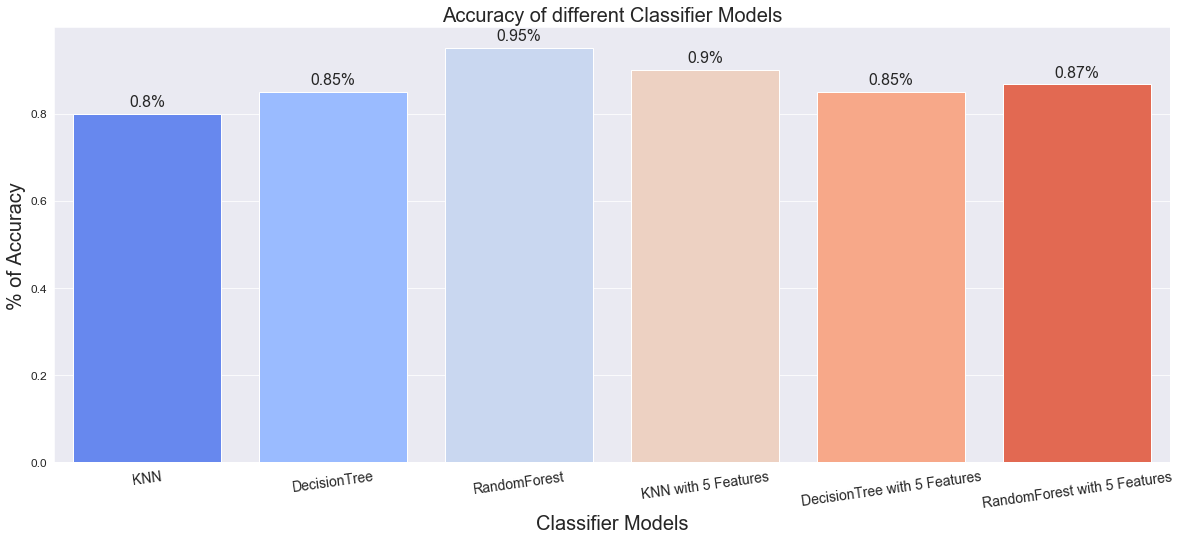

In [19]:
model_list = ['KNN', 'DecisionTree', 'RandomForest', 'KNN with 5 Features', 'DecisionTree with 5 Features', 'RandomForest with 5 Features']
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "coolwarm", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 14, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

### <a> It is evident from the above graph that only 5 Features can predict the Death Event in this model. Although, it is intereseting to note :</a>
* Random Forest Classifier gives the best result from all three classifiers used.
* This model can further be improved by using ANNs.